### Example 5.3 (Smooth Critical Points and the Amoeba Contour)
Compute and plot points on the contour of an amoeba.  
*Requirements: None*

In [1]:
# Define the polynomial under consideration and the system defining contour points
var('x,y,t')
H = 1-x-y-6*x*y-x^2*y^2
sys = [H,diff(H,x)*x-t*diff(H,y)*y]
sys

[-x^2*y^2 - 6*x*y - x - y + 1, (2*x^2*y + 6*x + 1)*t*y - (2*x*y^2 + 6*y + 1)*x]

In [2]:
# Parametrize the contour by Pyt(y,t) = 0 and x = R(y,t), 
# where Pyt is a polynomial and R is a rational function
R = PolynomialRing(QQbar,3,'x,y,t',order='lex')
GB = R.ideal([R(k) for k in sys]).groebner_basis()
Pyt = GB[-1]
X = SR(GB[-2]).solve(x)[0].rhs()

print("At a point of the contour y and t are roots of")
show(Pyt)
print("and x = {}".format(X))

At a point of the contour y and t are roots of


y^4*t^2 + (-4)*y^4*t + 4*y^4 + (-4)*y^3*t^2 + 48*y^3*t + (-44)*y^3 + 46*y^2*t^2 + (-68)*y^2*t + 28*y^2 + 14*y*t^2 + (-23)*y*t + 11*y + (-2)*t + 1

and x = (56*t^4 - 36*(t^4 - 6*t^3 + 13*t^2 - 12*t + 4)*y^3 + 16*t^3 + 6*(26*t^4 - 347*t^3 + 885*t^2 - 832*t + 268)*y^2 - 390*t^2 - (1708*t^4 - 6428*t^3 + 9009*t^2 - 5564*t + 1276)*y + 506*t - 188)/(56*t^4 - 172*t^3 + 186*t^2 - 85*t + 14)


In [3]:
# Determine the "bad" values of t, which cause the denominator of x to be zero
bad = [k.rhs() for k in X.denominator().solve(t,multiplicities=false)]

In [4]:
# Find points on the contour when t lies between -5 and 5
pt = plot([])
for tt in range(-500,500):
    T = tt/100
    if T not in bad:
        ys = CC['y'](Pyt.subs(t=T)).roots(multiplicities=false)
        for k in ys:
            xs = X.subs(y=k,t=T)
            pt += point([log(abs(xs)),log(abs(k))])

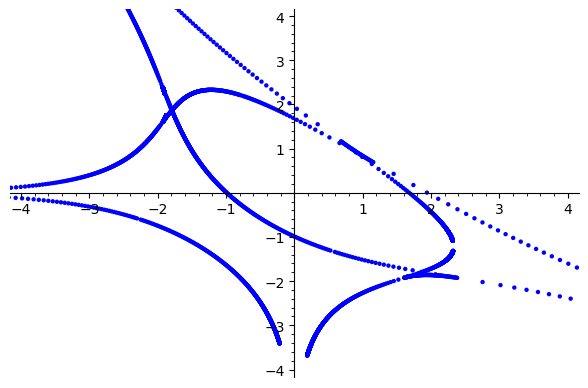

In [5]:
# Plot the computed points on the contour
show(pt, xmin=-4, xmax=4, ymin=-4, ymax=4)